In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
# Importing Packages

In [ ]:
df=pd.read_csv('Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df.info()
# To know aboyt Dtypes and null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [96]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [ ]:
df[['Age','Years of Experience','Salary']]=df[['Age','Years of Experience','Salary']].fillna(df[['Age','Years of Experience','Salary']].mean())
df[['Gender','Education Level','Job Title']]=df[['Gender','Education Level','Job Title']].fillna(df[['Gender','Education Level','Job Title']].mode().iloc[0])
df.isnull().sum()
# Replacing null of numerical columns with mean and categorical columms with mode

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [ ]:
df['Education Level'] = df['Education Level'].str.lower().str.strip()

df['Education Level'] = df['Education Level'].replace({
    "master's degree": "master's",
    "phd": "phd",
    "phd ": "phd"
})
# Fixing inconsitency in Education level.

In [ ]:
df = pd.get_dummies(df, columns=['Gender', 'Education Level'], drop_first=True, dtype=int)
df.head()
# encoding gender and education level columns. Creating new columns for each value in those columns.

,Age,Job Title,Years of Experience,Salary,Gender_Male,Gender_Other,Education Level_bachelor's degree,Education Level_high school,Education Level_master's,Education Level_phd
0,32.0,Software Engineer,5.0,90000.0,1,0,0,0,0,0
1,28.0,Data Analyst,3.0,65000.0,0,0,0,0,1,0
2,45.0,Senior Manager,15.0,150000.0,1,0,0,0,0,1
3,36.0,Sales Associate,7.0,60000.0,0,0,0,0,0,0
4,52.0,Director,20.0,200000.0,1,0,0,0,1,0


In [ ]:
df['Job Title'].nunique()
# Number of unique job titles

193

In [ ]:
def categorize_job(title):
    title = title.lower()

    # ----- Top Leadership -----
    if any(word in title for word in ['chief', 'ceo', 'cto', 'cfo']):
        return 'Executive'
    
    if 'director' in title or 'vp' in title:
        return 'Director'
    
    if 'manager' in title:
        return 'Manager'
    
    # ----- Seniority -----
    if 'senior' in title or 'principal' in title:
        return 'Senior_Individual'
    
    if 'junior' in title:
        return 'Junior_Individual'
    
    # ----- Domain Focus -----
    if any(word in title for word in ['engineer', 'developer', 'software', 'architect']):
        return 'Engineering'
    
    if any(word in title for word in ['data', 'scientist', 'analyst']):
        return 'Data'
    
    if any(word in title for word in ['sales', 'marketing', 'business development']):
        return 'Sales_Marketing'
    
    if any(word in title for word in ['finance', 'financial', 'accountant', 'hr', 'human resources']):
        return 'Finance_HR'
    
    return 'Operations_Other'

# Categorizing job title in 10 categories. By doing this we lose some accuracy but prevent Overfitting. Because if not done, then we 
# will have 193 columns after encoding


In [102]:
df['Job Category'] = df['Job Title'].apply(categorize_job)
df['Job Category'].nunique()

10

In [ ]:
df = pd.get_dummies(df, columns=['Job Category'], drop_first=True, dtype=int)
df.drop(columns=['Job Title'], inplace=True)
# encoding Job Category column -creating new columns for each type of value. and dropping the old column.

In [ ]:
df.info()
# Ready to Split

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6704 non-null   float64
 1   Years of Experience                6704 non-null   float64
 2   Salary                             6704 non-null   float64
 3   Gender_Male                        6704 non-null   int64  
 4   Gender_Other                       6704 non-null   int64  
 5   Education Level_bachelor's degree  6704 non-null   int64  
 6   Education Level_high school        6704 non-null   int64  
 7   Education Level_master's           6704 non-null   int64  
 8   Education Level_phd                6704 non-null   int64  
 9   Job Category_Director              6704 non-null   int64  
 10  Job Category_Engineering           6704 non-null   int64  
 11  Job Category_Executive             6704 non-null   int64

In [105]:
X = df.drop('Salary', axis=1)
y = df['Salary']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train['Age'].head())
print(X_test['Age'].head())

2922    52.0
4941    26.0
135     39.0
2306    23.0
3433    38.0
Name: Age, dtype: float64
2794    43.0
2233    34.0
5559    27.0
6355    28.0
263     31.0
Name: Age, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

X_train_scaled[['Age','Years of Experience']] = scaler.fit_transform(
    X_train[['Age','Years of Experience']]
)

X_test_scaled[['Age','Years of Experience']] = scaler.transform(
    X_test[['Age','Years of Experience']]
)

print(X_test_scaled['Age'].head())
print(X_train_scaled['Years of Experience'].head())

# Scaling numberical columns because Linear regression performs better when scaled. So scaled Age and Years of Experience


2794    1.225223
2233    0.043987
5559   -0.874752
6355   -0.743504
263    -0.349758
Name: Age, dtype: float64
2922    3.432419
4941   -0.517759
135     0.305194
2306   -1.176123
3433    0.469785
Name: Years of Experience, dtype: float64


In [108]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [109]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

print("R2 : ",r2_score(y_test,y_pred))
print("Rmse : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R2 :  0.7923122765101429
Rmse :  23551.421784853126


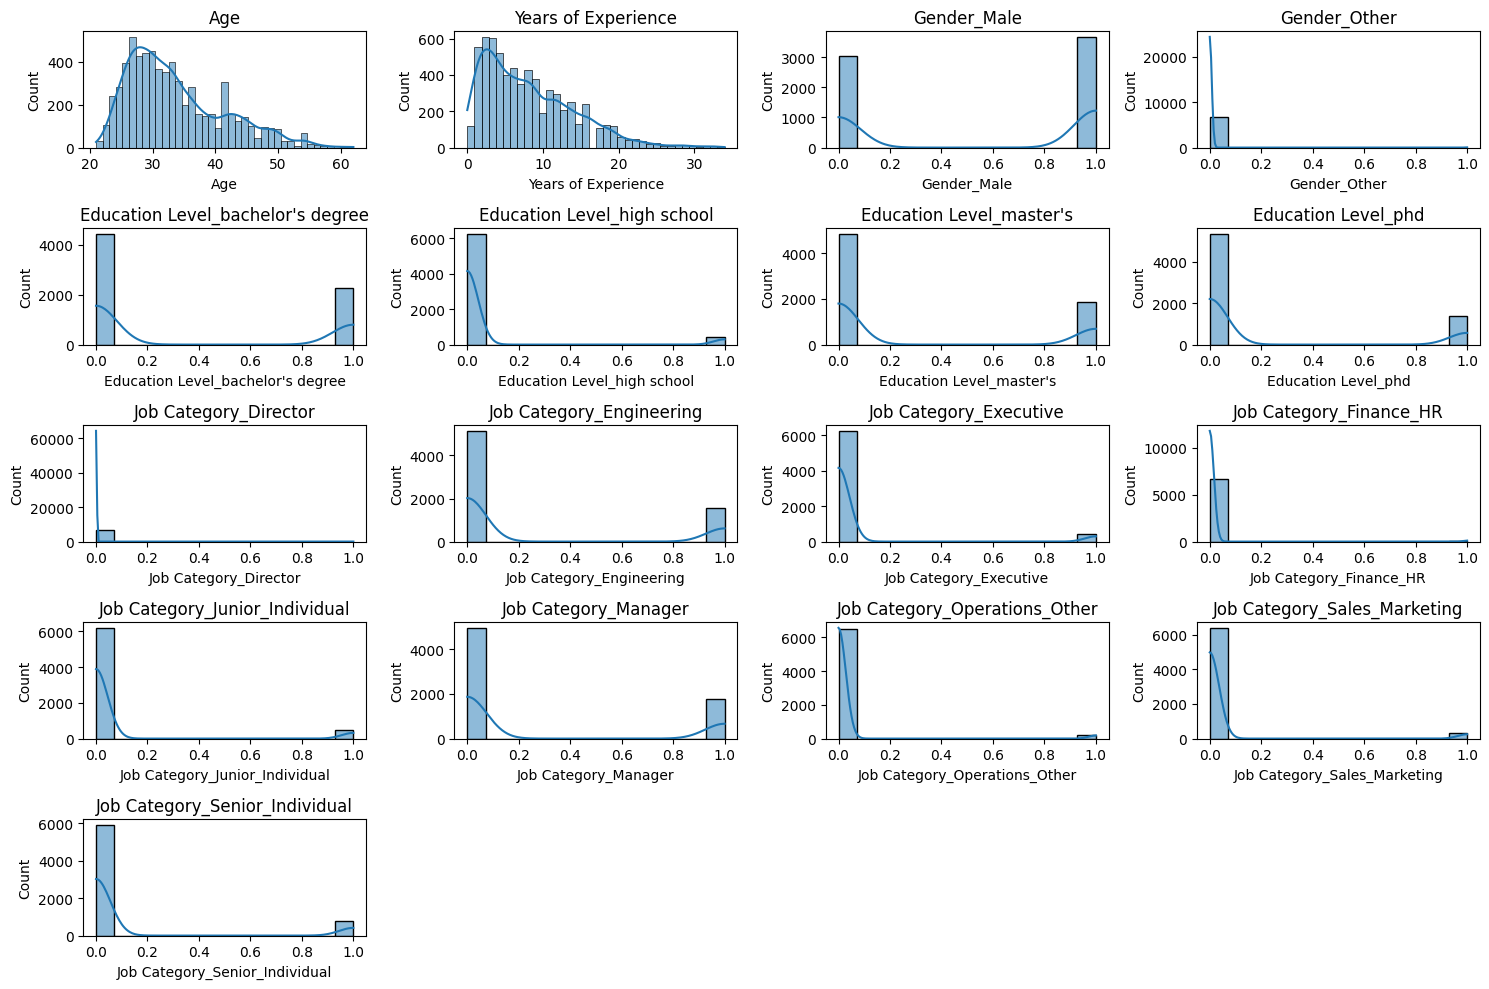

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(X.columns,1):
    plt.subplot(5,4,i)
    sns.histplot(df[col],kde = True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Histograms just for fun

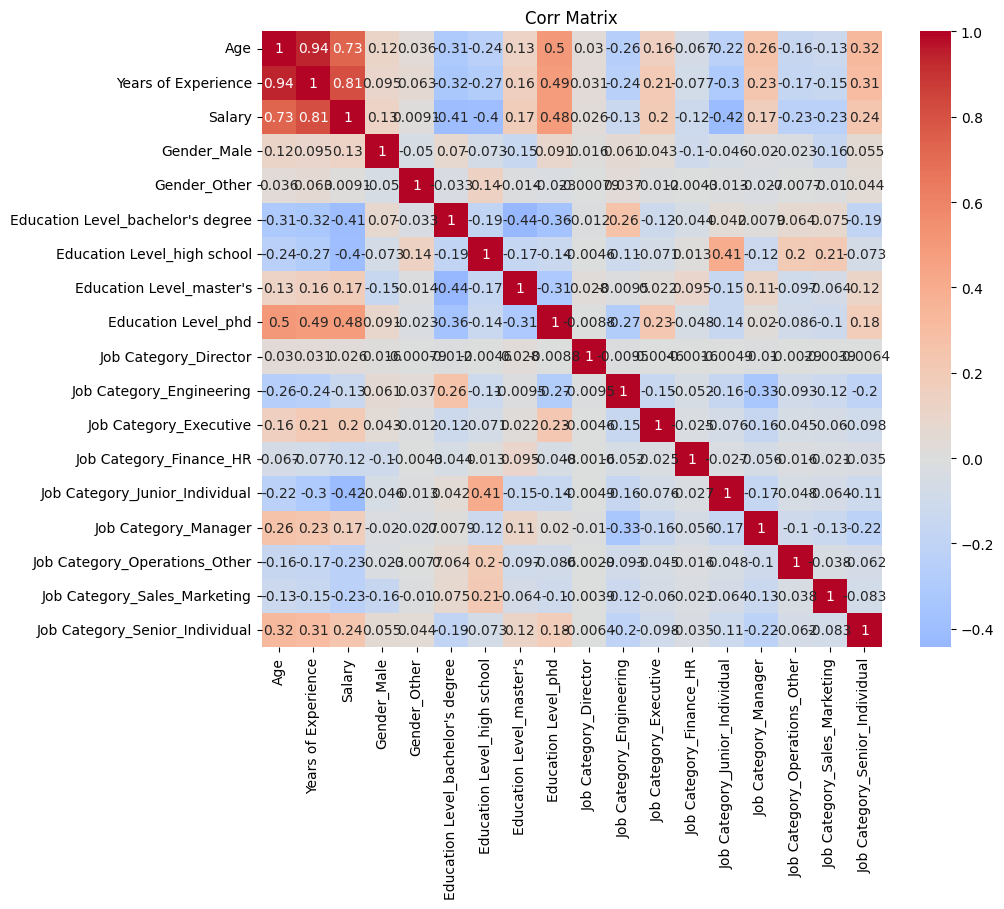

In [ ]:
# corr
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',center=0)
plt.title('Corr Matrix')
plt.show()

# Corr matrix to find best feature. It is Years of Experience

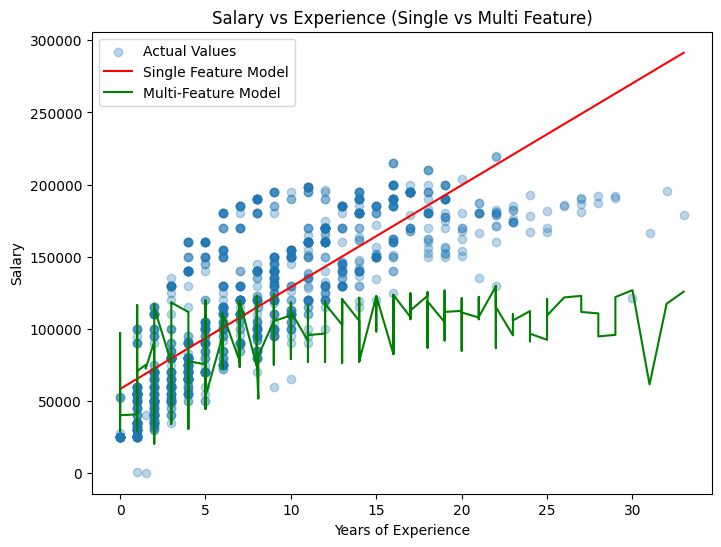

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Single feature model
single_feature_model = LinearRegression()
single_feature_model.fit(X_train[['Years of Experience']], y_train)

# Predictions
y_pred_single = single_feature_model.predict(X_test[['Years of Experience']])
y_pred_multi = model.predict(X_test_scaled)

# Extract feature
years_test = X_test['Years of Experience'].values

# Sort values for clean line plotting
sorted_index = np.argsort(years_test)
years_sorted = years_test[sorted_index]
y_test_sorted = y_test.values[sorted_index]
y_single_sorted = y_pred_single[sorted_index]
y_multi_sorted = y_pred_multi[sorted_index]

# Plot
plt.figure(figsize=(8,6))

plt.scatter(years_sorted, y_test_sorted, alpha=0.3, label="Actual Values")

plt.plot(years_sorted, y_single_sorted, color='red', label='Single Feature Model')

plt.plot(years_sorted, y_multi_sorted, color='green', label='Multi-Feature Model')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience (Single vs Multi Feature)')
plt.legend()
plt.show()


# Comparing 2 models 
# 1. Model trained with all columns.
# 2. Model trained only on Years of Experience Column.

In [124]:
single_feature_model = LinearRegression()

single_feature_model.fit(X_train[['Years of Experience']], y_train)

y_pred_single = single_feature_model.predict(X_test[['Years of Experience']])



print("R2 : ",r2_score(y_test,y_pred_single))
print("Rmse : ",np.sqrt(mean_squared_error(y_test, y_pred_single)))

R2 :  0.6528690431769464
Rmse :  30447.973296595836


In [ ]:
# Ridge 
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled,y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print("R2 ; ",r2_score(y_test,y_pred_ridge))
# Checking if ridge will do better. No

R2 ;  0.7925288830880359


In [ ]:
coef_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)
# How much each column changes the target.

                              Feature   Coefficient
1                 Years of Experience   6452.916524
2                         Gender_Male   2642.011169
8               Job Category_Director    841.625559
0                                 Age   -761.058821
10             Job Category_Executive  -6166.447490
7                 Education Level_phd  -6800.476791
9            Job Category_Engineering  -7555.894582
13               Job Category_Manager -11476.576545
16     Job Category_Senior_Individual -13183.037882
6            Education Level_master's -15627.649650
3                        Gender_Other -25612.564281
15       Job Category_Sales_Marketing -30089.977991
4   Education Level_bachelor's degree -34018.599777
14      Job Category_Operations_Other -35388.735141
12     Job Category_Junior_Individual -41237.646558
5         Education Level_high school -42360.957695
11            Job Category_Finance_HR -51502.300223


### Final Accuracies : 
1. Primary model :
-  R2 : 0.7923122765101429
- Rmse : 23551.421784853126
2. Model trained on One feature :
- R2 :  0.6528690431769464
- Rmse :  30447.973296595836
3. Ridge :
- R2 :  0.7925288830880359